# Análisis Exploratorio: Spaceship Titanic

## Introducción
Este cuaderno presenta el análisis exploratorio de datos (EDA) del conjunto de datos del desafío [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic) de Kaggle. El objetivo del desafío es predecir si los pasajeros fueron transportados a una dimensión alternativa durante el viaje espacial mediante el entrenamiento de un modelo predictivo.

**Enfoque de este análisis:**
- Exploración inicial de la estructura de datos
- Identificación de valores faltantes
- Análisis de distribuciones y relaciones entre variables
- Preparación para el preprocesamiento de datos

**Herramientas utilizadas:**
- Python (Pandas, NumPy)
- Visualización (Seaborn, Matplotlib)
- Scikit-learn (para transformaciones iniciales)

## 1. Carga de datos y configuración inicial

### 1.1 Importación de bibliotecas

In [550]:
# Librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de las visualizaciones
sns.set_theme(style='dark',palette='dark', font_scale=1.4)


### 1.2 Carga de los datos

In [551]:
# Cargar los datos
train_data_original = pd.read_csv('Data/train.csv')
test_data_original = pd.read_csv('Data/test.csv')

# Labels de cada columna obtenidos previamente por comodidad
numerical_keys = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_keys = ['PassengerId', 'HomePlanet', 'Cabin', 'Destination','CryoSleep', 'VIP', 'Name']

# Copia para hacer el análisis exploratorio
train_data = train_data_original.copy()

## 2 Vista general de los datos
### 2.1 Primera observaciones

In [552]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



En la tabla tenemos presente los datos personales de cada pasajero abordo. Estos corresponden a:

- PassengerId   (String)    : Id del boleto comprado por el pasajero/n
- HomePlanet    (String)    : El planeta de origen
- CryoSleep     (Bool)      : Si el pasajero viajaba con cryo - sueño o no
- Cabin         (String)    : El código de la cabina, En formato deck/num/side, donde side puede ser P de Port o S de Starboard
- Destination   (String)    : El planeta destino del pasajero
- Age           (Float)     : Edad
- VIP           (Bool)      : Si el pasajero compró pasaje vip o no
- RoomService   (Float)     : Cantidad de dinero gastado en servicio a la habitación
- FoodCourt     (Float)     : Cantidad de dinero gastado en comida
- ShoppingMall  (Float)     : Cantidad de dinero gastado en compras de centro compercial
- Spa           (Float)     : Cantidad de dinero gastado en Spa
- VRDeck        (Float)     : Cantidad de dinero gastado en cabina virtual
- Name          (String)    : Nombre y Apellido
- Transported   (Bool)      : Si el pasajero fue transportado o no ( este es el objetivo a predecir )

### Informacion estructural


In [553]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [554]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- 8693 registros (filas)
- 14 características (columnas)
- ~2% de valores faltantes en la mayoría de las columas
- Tipos de datos consistentes con la naturaleza de cada variable

- **Edad promedio**: 28.8 años (rango: 0-79 años)
- **Gastos**: La mayoría de pasajeros no utilizaron servicios adicionales
 - 75% de pasajeros gastaron menos de $50 en VRDeck
 - Valores máximos extremos de hasta +$24K indican posibles outliers
 
 ## 3 Manejo de valores faltantes


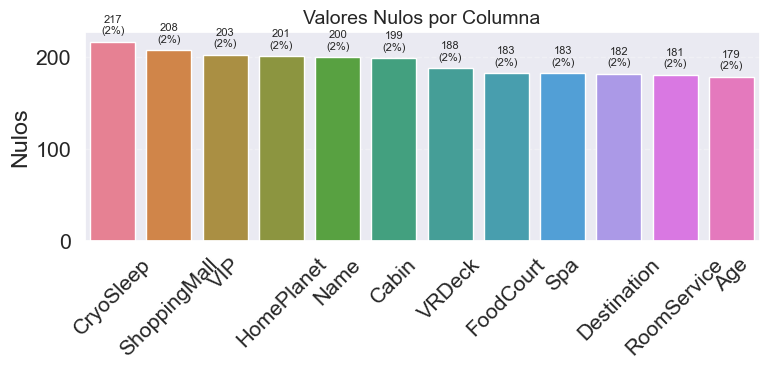

In [555]:
# Calcular y filtrar valores nulos
null_counts = train_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

# Configuración rápida
plt.figure(figsize=(8, 4))

# Crear gráfico
ax = sns.barplot(x=null_counts.index, y=null_counts.values, hue=null_counts.index,)

# Personalización mínima pero efectiva
plt.title("Valores Nulos por Columna", fontsize=14)
plt.xlabel("")
plt.ylabel("Nulos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Añadir etiquetas compactas
for i, count in enumerate(null_counts):
    ax.text(i, count + 0.03 * max(null_counts), 
            f"{count}\n({count/len(train_data):.0%})", 
            ha='center', 
            va='bottom',
            fontsize=8)

plt.tight_layout()
plt.show()


Todas las columnas tiene aproximadamente 2% de valores faltantes

Variables mayor cantidad de valores faltantes:
- CryoSleep (2.5%)
- VIP (2.3%)

PassengerId no tiene valores faltantes.

Estrategia de manejo:

- Variables numéricas: Imputación con mediana (robusta a outliers)

- Variables categóricas: Imputación con moda o categoría "Desconocido"

- Análisis detallado por variable en próximas secciones

## 4 Análisis por columna
### 4.1 PassengerId
El atributo PassengerId viene dado en formato gggg_pp de donde g es el numero de grupo del pasajero y p es su numerod entro del grupo.
Lo que haremos primero será separar el id en  GrupoId y SubId para analizar por separado. Finalmente tranformaremos estos valores a números enteros.
Hay que notar que passengerId no tiene valores nulos. Tambien podemos contar la cantidad de pasajeros en cada grupo para ver si viene acompañado o no.

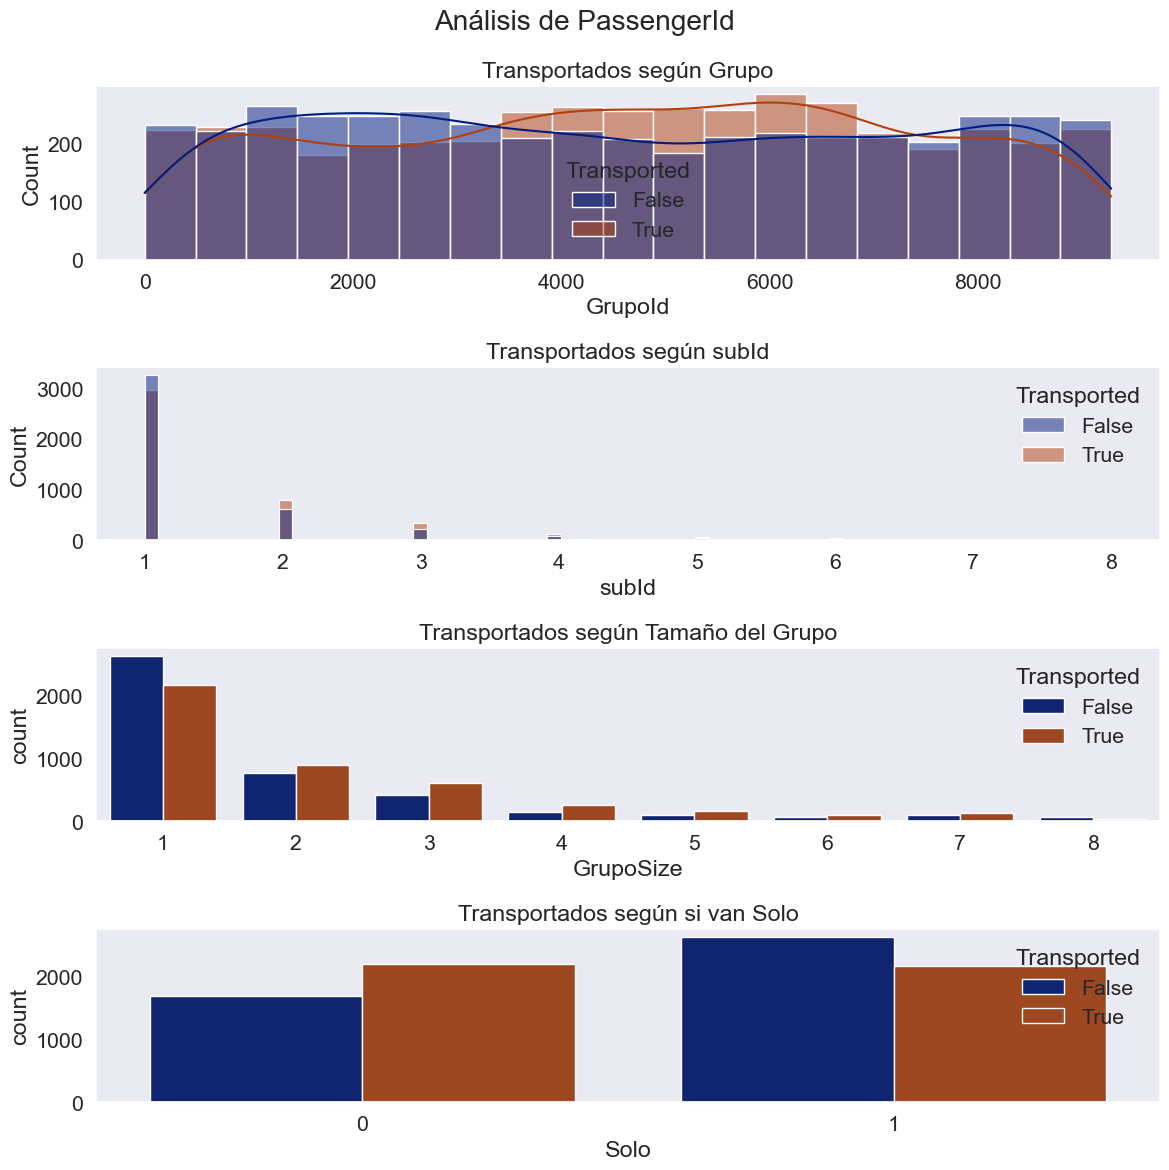

In [ ]:


# Extracción del numero del grupo y el sub id presente en el id del pasajero
train_data[['GrupoId','subId']] =  train_data['PassengerId'].str.split('_',expand=True ).astype(int)

#Calculamos el tamaño del grupo agrupando por GrupoId y contando
train_data['GrupoSize'] = train_data[['GrupoId','subId']].groupby('GrupoId')['GrupoId'].transform('count')

# Si el pasajero se encuentra solo en su grupo se guarda el regristro
train_data['Solo'] = (train_data['GrupoSize']== 1).astype(int)

# Visualización de los datos obtenidos
plt.figure(figsize=(12,12))
plt.suptitle('Análisis de PassengerId')

# Histograma del Id único de grupo apilados cada 500
plt.subplot(4,1,1)
sns.histplot(data=train_data, x='GrupoId', hue='Transported', binwidth=500, multiple='layer', kde=True)
plt.title('Transportados según Grupo')

plt.subplot(4,1,2)
sns.countplot(data=train_data, x='subId', hue='Transported')
plt.title('Transportados según subId')

# Hisograma segun el tamaño del grupo
plt.subplot(4,1,3)
sns.countplot(data=train_data, x='GrupoSize', hue='Transported')
plt.title('Transportados según Tamaño del Grupo')

# histograma segun si van solos o no
plt.subplot(4,1,4)
sns.countplot(data=train_data, x='Solo', hue='Transported')
plt.title('Transportados según si van Solo')

plt.tight_layout()


**Hallazgos**:

- Todos los grupos tienen entre 1 y 8 miembros

- 72% de pasajeros viajan solos (grupos de 1)

Los grupos más grandes muestran mayor probabilidad de transporte simultáneo

**Relación entre grupo y transporte**

Patrón identificado:

Se observan 3 zonas con comportamiento distinto

- Grupos 0-3500: Tasa de transporte baja 

- Grupos 3500-7500: Tasa de transporte alta 

- Grupos 7500+: Tasa variable 

Conclusión preliminar:
La pertenencia a un grupo específico podría ser un predictor importante para la variable objetivo. Podria ser mas conveniente categorizarlos en solos dos variables booleanas


## Planeta de origen y destino

Veremos como se distribuyen los transportados segun los distintos planetas de origen y segun los destinos del pasajero.

Finalmente juntaremos ambos datos agurupandolos en 6 categorias llamadas Plan de Viaje que analizaremos

En un principio los valores nulos los consideraremos como Unknown

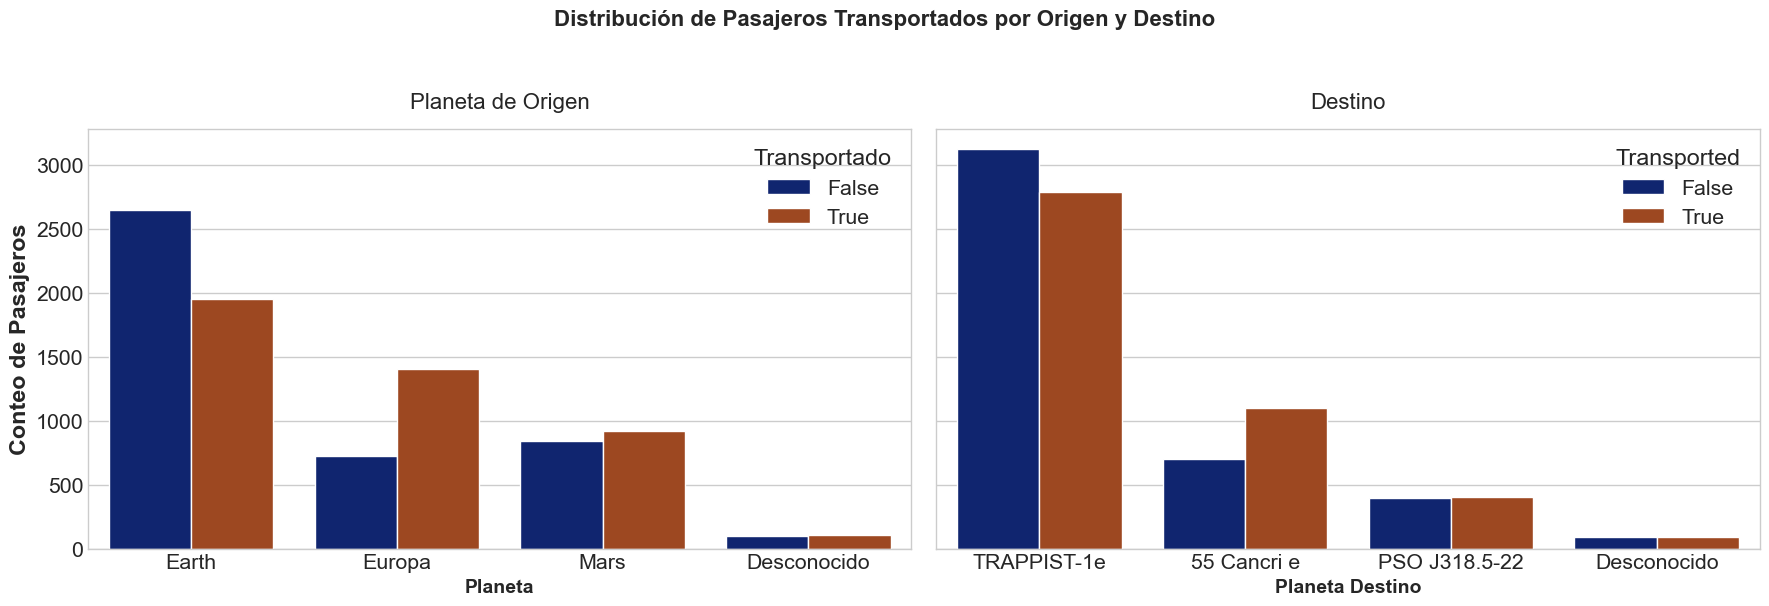

In [557]:


# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
palette = {'True': '#2c7bb6', 'False': '#d7191c'}

# Crear figura con subgráficos
fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle('Distribución de Pasajeros Transportados por Origen y Destino', fontsize=16, fontweight='bold', y=1.02)

# Categorizaremos los valores nulos con 'Desconocido' en caso de que tengan alguna característica interesante
train_data['HomePlanet'] = train_data['HomePlanet'].fillna('Desconocido')
train_data['Destination'] = train_data['Destination'].fillna('Desconocido')

# Gráfico de planeta de origen
sns.countplot(data=train_data, x='HomePlanet', hue='Transported',order=['Earth', 'Europa', 'Mars','Desconocido'], ax=ax[0]
)
ax[0].set_title('Planeta de Origen', fontsize=16, pad=15)
ax[0].set_xlabel('Planeta', fontweight='bold', fontsize=14)
ax[0].set_ylabel('Conteo de Pasajeros', fontweight='bold')
ax[0].legend(title='Transportado', loc='upper right')

# Gráfico de destino
sns.countplot(data=train_data, x='Destination', hue='Transported',order=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'Desconocido' ], ax=ax[1]
)
ax[1].set_title('Destino', fontsize=16, pad=15)
ax[1].set_xlabel('Planeta Destino', fontweight='bold', fontsize=14)
ax[1].set_ylabel('')
#ax[1].get_legend().remove()

# Ajustes finales
plt.tight_layout()
plt.show()


Podemos ver como la mayoría de los pasajeros vienen de la tierra y van a TRAPPIST-1e y ambos presentan la misma tendencia.

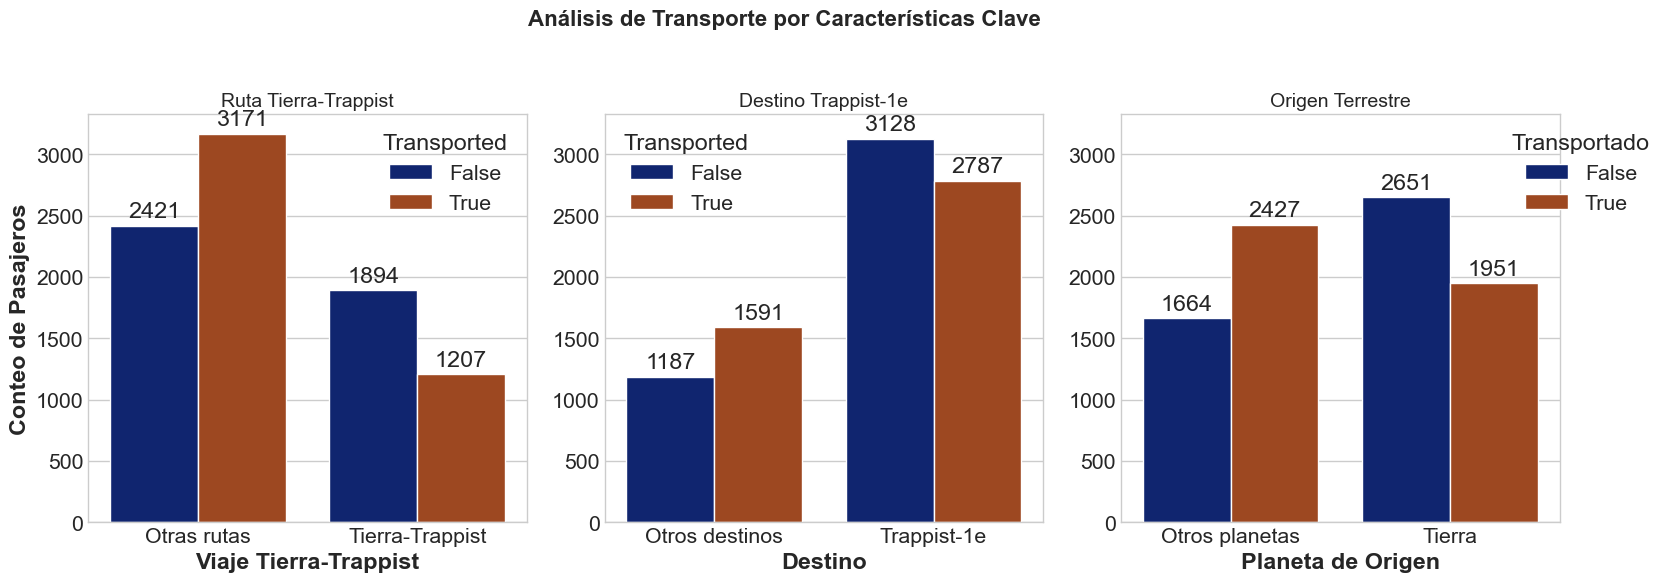

In [558]:
# Crear nuevas características directamente en el DataFrame principal
train_data['T-T'] = (train_data['HomePlanet'] == 'Earth') & (train_data['Destination'] == 'TRAPPIST-1e')
train_data['A_trappist'] = (train_data['Destination'] == 'TRAPPIST-1e')
train_data['terricola'] = (train_data['HomePlanet'] == 'Earth')

plt.figure(figsize=(16, 6), )
plt.suptitle('Análisis de Transporte por Características Clave', fontsize=16, fontweight='bold')

# 1. Gráfico Tierra-Trappist
plt.subplot(1, 3, 1, )
ax1 = sns.countplot(data=train_data, x='T-T', hue='Transported')
plt.title('Ruta Tierra-Trappist', fontsize=14)
plt.xlabel('Viaje Tierra-Trappist', fontweight='bold')
plt.xticks([False, True], ['Otras rutas', 'Tierra-Trappist'])
plt.ylabel('Conteo de Pasajeros', fontweight='bold')

# Añadir porcentajes
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3)

# 2. Gráfico Destino Trappist
plt.subplot(1, 3, 2,sharey=ax1)
ax2 = sns.countplot(data=train_data, x='A_trappist', hue='Transported')
plt.title('Destino Trappist-1e', fontsize=14)
plt.xlabel('Destino', fontweight='bold')
plt.xticks([False, True], ['Otros destinos', 'Trappist-1e'])
plt.ylabel('')

# Añadir porcentajes
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', padding=3)

# 3. Gráfico Origen Terrestre
plt.subplot(1, 3, 3,sharey=ax1)
ax3 = sns.countplot(data=train_data, x='terricola', hue='Transported')
plt.title('Origen Terrestre', fontsize=14)
plt.xlabel('Planeta de Origen', fontweight='bold')
plt.xticks([False, True], ['Otros planetas', 'Tierra'])
plt.ylabel('')

# Añadir porcentajes
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', padding=3)

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para el título principal
plt.legend(title='Transportado', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## CryoSleep

Este atributo contiene una gran cantidad de contraste en sus valores por lo que puede ser importante.
Mas adelante intetaremos relacionarlo con otros atributos como la cabina o si es vip

## VIP

En contraste, parece que vip no es un atributo determinante en el resultado final. Sin embargo puede ser util cruzarlo con alguna otra info.

Text(0, 0.5, '')

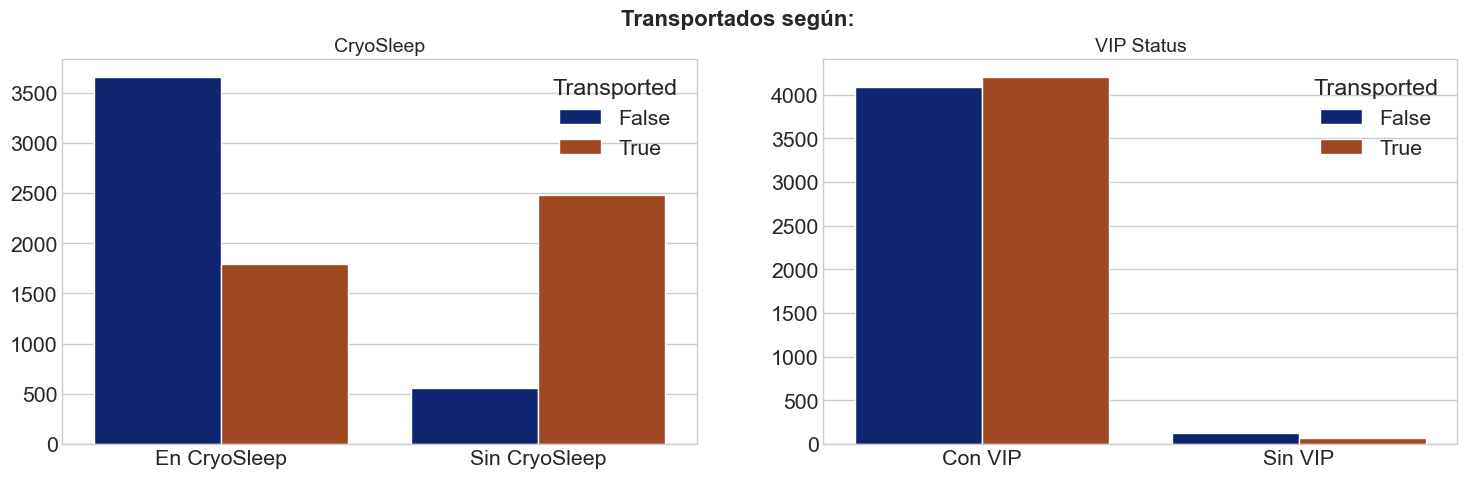

In [559]:
plt.figure(figsize=(18,5))
plt.suptitle('Transportados según:', fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
ax1 = sns.countplot(data=train_data, x='CryoSleep', hue='Transported' )
plt.title('CryoSleep', fontsize=14)
plt.xlabel('', fontweight='bold')
plt.xticks([False, True], ['En CryoSleep', 'Sin CryoSleep'])
plt.ylabel('')

aa = plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=train_data, x='VIP', hue='Transported' )
plt.title('VIP Status', fontsize=14)
plt.xlabel('', fontweight='bold')
plt.xticks([False, True], ['Con VIP', 'Sin VIP'])
plt.ylabel('')


## Cabin  D/NN/S
La cabina viene en formato deck/num/side, es decir Cubierta, Número y Lado, donde lado puede ser P de Port o S de Starboard.
Cada piso o cubierta esta designada con una letra, dentro de cada cubierta existe un numero y un lado.

Por ahora asignaremos los valores desconocidos como X/nan/X

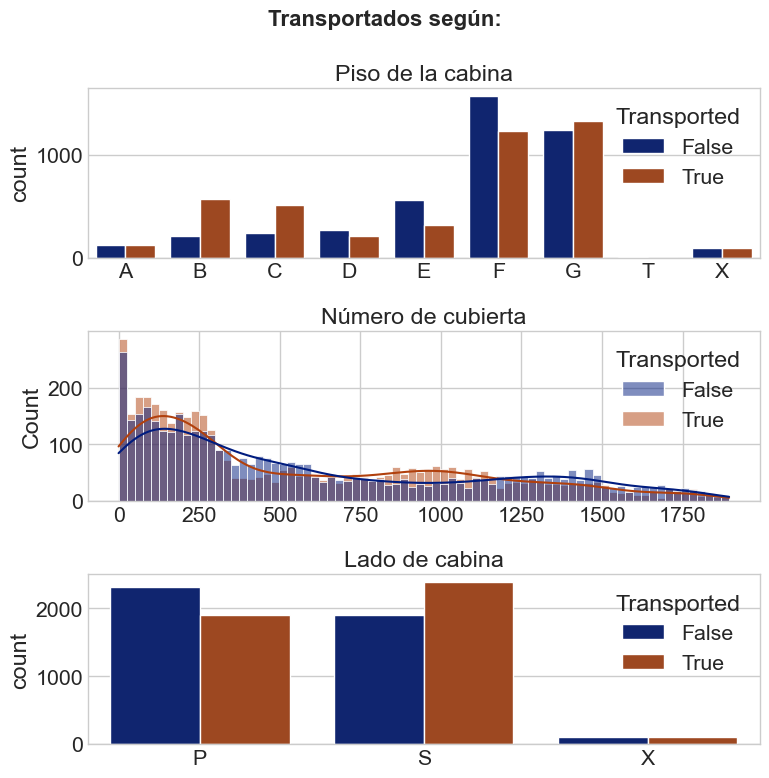

In [560]:
######################################################################################################################
#train_data = train_data[['Cabin', 'Transported']].copy()
train_data['Cabin'] = train_data['Cabin'].fillna('X/0000/X')
train_data[['Piso', 'Número de cubierta', 'Lado']] = train_data['Cabin'].str.split('/', expand=True)
train_data['Número de cubierta'] = train_data['Número de cubierta'].astype(float)
######################################################################################################################

plt.figure(figsize=(8,8))
plt.suptitle('Transportados según:', fontsize=16, fontweight='bold')

plt.subplot(3,1,1)
sns.countplot(data=train_data, x='Piso', hue='Transported', order=train_data['Piso'].sort_values())
plt.title('Piso de la cabina')
plt.xlabel('', fontweight='bold')


plt.subplot(3,1,2)
sns.histplot(data=train_data, x='Número de cubierta', hue='Transported', binwidth=25, kde=True )
#sns.histplot(data=train_data, x='Número de cubierta', hue='Transported', binwidth=100, fill=False )
plt.title('Número de cubierta')
plt.xlabel('', fontweight='bold')


plt.subplot(3,1,3)
sns.countplot(data=train_data, x='Lado', hue='Transported' )
plt.title('Lado de cabina')
plt.xlabel('', fontweight='bold')

plt.tight_layout()

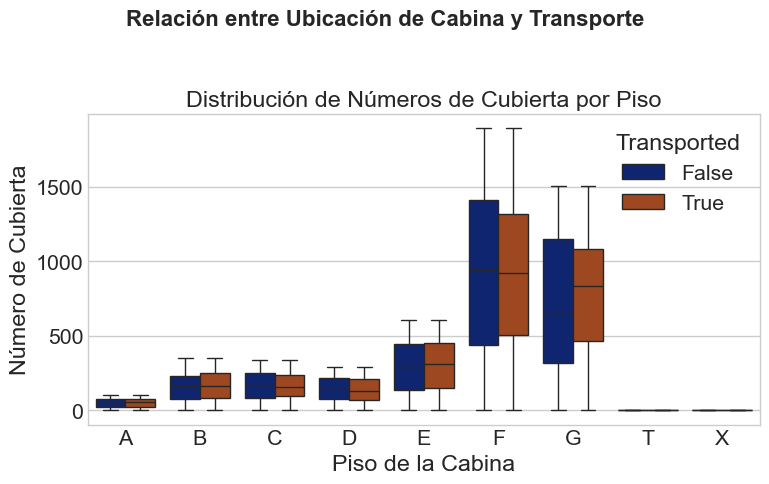

In [561]:

plt.figure(figsize=(8, 5))
plt.suptitle('Relación entre Ubicación de Cabina y Transporte', fontsize=16, fontweight='bold')

# 1. Número de cubierta vs Piso con Transporte
sns.boxplot(data=train_data, x='Piso', y='Número de cubierta', hue='Transported', 
            order=['A','B','C','D','E','F','G','T', 'X'])
plt.title('Distribución de Números de Cubierta por Piso')
plt.xlabel('Piso de la Cabina')
plt.ylabel('Número de Cubierta')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Lo mejor parece ubicar a los pasajeros en 4 zonas segun el número, siendo la zona mas comúm la primera. Colocaremos los valores desconocidos dentro de esta categoría al momento de asignas 0 al dato nulo, de esta forma tendremos la siguiente distribución categorizada

Text(0.5, 0, '')

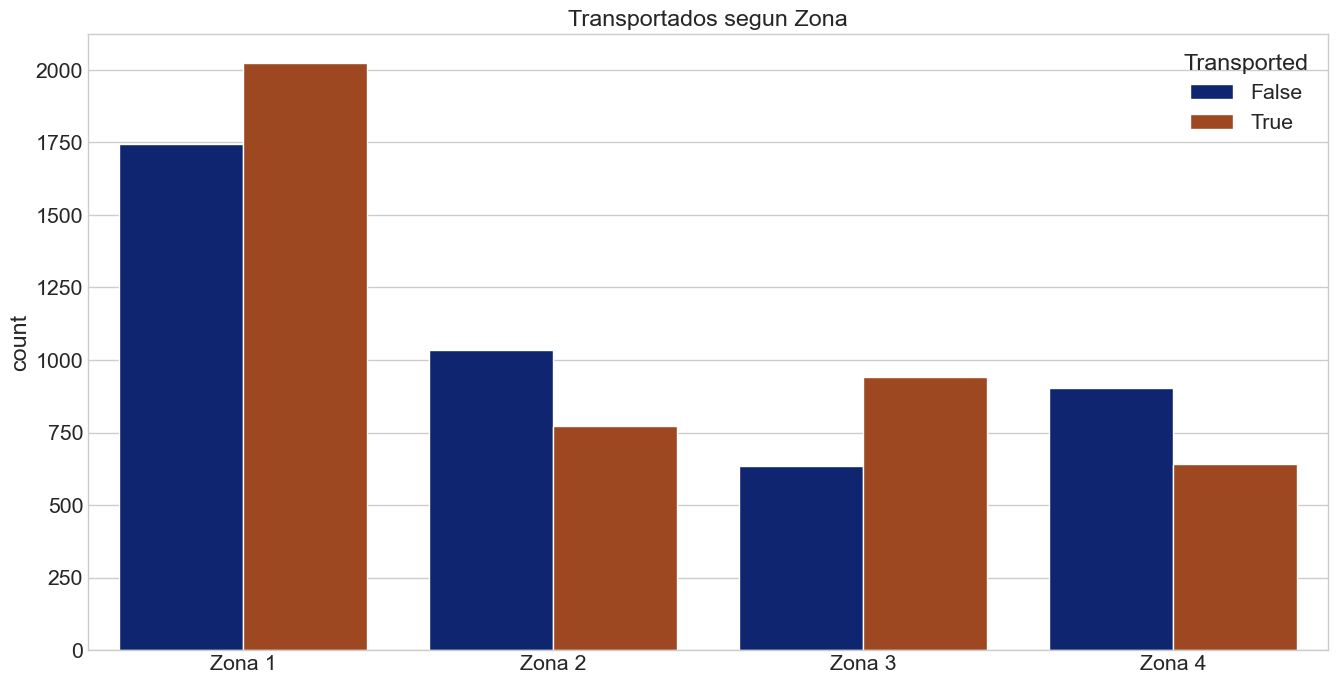

In [562]:
train_data['Zona'] = ''
train_data.loc[  train_data['Número de cubierta'] <= 300, 'Zona' ] = 'Zona 1'
train_data.loc[  (train_data['Número de cubierta'] > 300) & (train_data['Número de cubierta'] <= 700), 'Zona' ] = 'Zona 2'
train_data.loc[  (train_data['Número de cubierta'] > 700) & (train_data['Número de cubierta'] <= 1175), 'Zona' ] = 'Zona 3'
train_data.loc[  (train_data['Número de cubierta'] > 1175) , 'Zona' ] = 'Zona 4'

plt.figure(figsize=(16,8))
sns.countplot(data=train_data, x='Zona', hue='Transported')
plt.title('Transportados segun Zona')
plt.xlabel('')

## Edad

La edad es conveniente transformarla a una variable categorica, podemos filtrar por rango etario para analizar la distribución

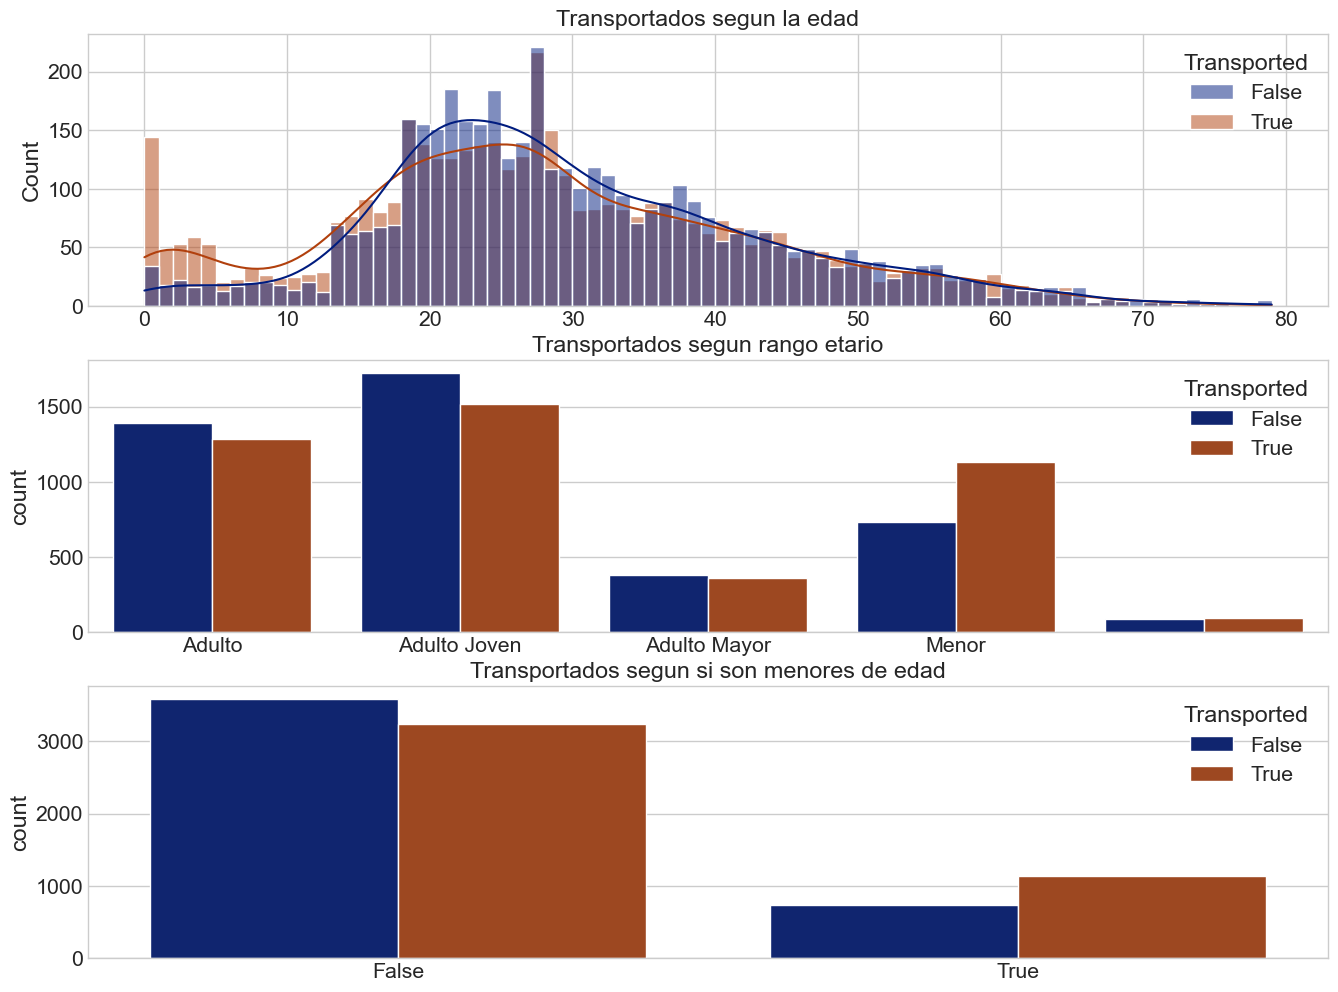

In [563]:
######################################################################################################################
train_data['Rango etario'] = ''
train_data.loc[  train_data['Age'] <= 18, 'Rango etario' ] = 'Menor'
train_data.loc[  (train_data['Age'] > 18) & (train_data['Age'] <= 30), 'Rango etario' ] = 'Adulto Joven'
train_data.loc[  (train_data['Age'] > 30) & (train_data['Age'] <= 50), 'Rango etario' ] = 'Adulto'
train_data.loc[  (train_data['Age'] > 50 ), 'Rango etario' ] = 'Adulto Mayor'
######################################################################################################################

train_data['MenorDeEdad'] = train_data['Age'] <= 18 


# Remplazar nulos en edad con la mediana
train_data['Age'] = train_data['Age'].fillna( train_data['Age'].median() )

plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
sns.histplot(data=train_data, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Transportados segun la edad')
plt.xlabel('')

plt.subplot(3,1,2)
sns.countplot(data=train_data, x='Rango etario', hue='Transported')
plt.title('Transportados segun rango etario')
plt.xlabel('')

plt.subplot(3,1,3)
sns.countplot(data=train_data, x='MenorDeEdad', hue='Transported')
plt.title('Transportados segun si son menores de edad')
plt.xlabel('')



plt.show()

## Nombre del pasajero

De aqui podriamos inferir información como la cantidad de familiares abordo


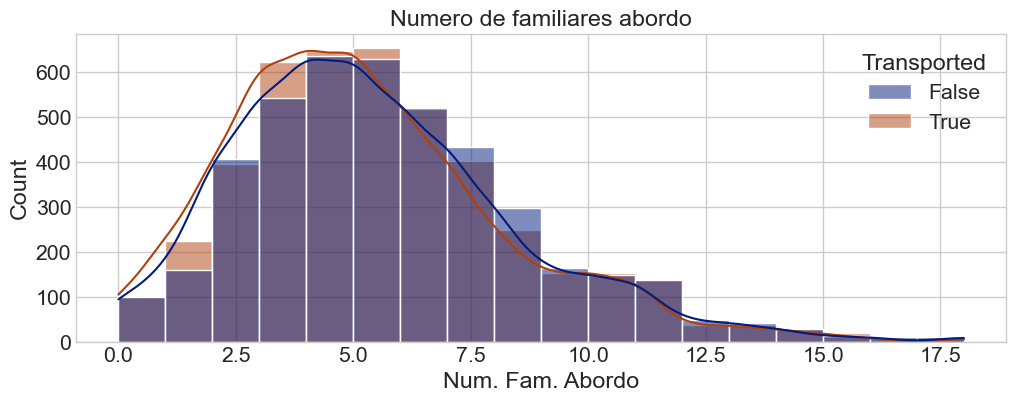

In [564]:
data_nombres = train_data[['Name', 'Transported']].copy()

data_nombres[['Nombre', 'Apellido']] = data_nombres['Name'].str.split(' ', expand=True)
apellido_count = data_nombres['Apellido'].value_counts()


data_nombres['Num. Fam. Abordo'] = data_nombres['Apellido'].map(apellido_count)
# Si no tiene datos se asume que vino solo
data_nombres['Num. Fam. Abordo']= data_nombres['Num. Fam. Abordo'].fillna(0)

plt.figure(figsize=(12,4))
sns.histplot(data=data_nombres, x='Num. Fam. Abordo', hue='Transported', kde=True, binwidth=1)
plt.title('Numero de familiares abordo')
plt.show()

train_data[['Nombre', 'Apellido','Num. Fam. Abordo']] = data_nombres[['Nombre', 'Apellido','Num. Fam. Abordo']]

## Analisando los gastos del pasajero
Son 5 formas de gasto y los histogramas muestran que la mayoría de los pasajeros gastaron poco o nada de dinero en la mayoría de las opciones

In [565]:
label_gastos = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Si estaba en cryo sleep no pudo gastar por lo que remplazamos con 0
train_data.loc[train_data['CryoSleep'] == True, label_gastos] = 0

# Tambien asumismos que si es menor de 15 no usó su propio dinero
train_data.loc[ train_data['Age'] <= 15 , label_gastos] = 0

# Aqui solo imputo los valores de la mediana de cada columna.. en otro intento utilizo la mediana pero agrupada por otras categorias
for col in label_gastos:
    # Calcular mediana por grupo
    #median_by_group = train_data.groupby('VIP')[col].transform('median')
    # Imputar valores faltantes
    #valores_numericos[col] = valores_numericos[col].fillna(median_by_group)
    
    
    # Para cualquier valor faltante restante (si hay grupos vacíos)
    train_data[col] = train_data[col].fillna(train_data[col].median())


# Ahora calculo el gasto total sumando los valores de cada columna
train_data['Gasto Total'] = train_data[label_gastos].sum(axis=1,skipna=False)




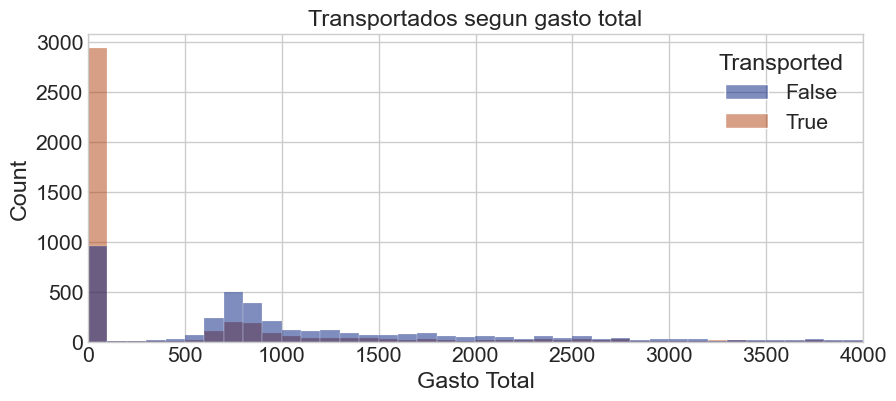

In [566]:
plt.figure(figsize=(10,4))
sns.histplot(data=train_data, x='Gasto Total',binwidth=100, hue='Transported')
plt.xlim([0,4000])
plt.title('Transportados segun gasto total')
plt.show()

La mayoría de los pasajeros ha gastado menos de mil dolares. Por lo tanto separaremos los datos en dos categorias, los que han gastado mas y menos que mil dolares. De esta forma podremos apreciar mayor contraste, lo que será beneficiario para entrenar los modelos

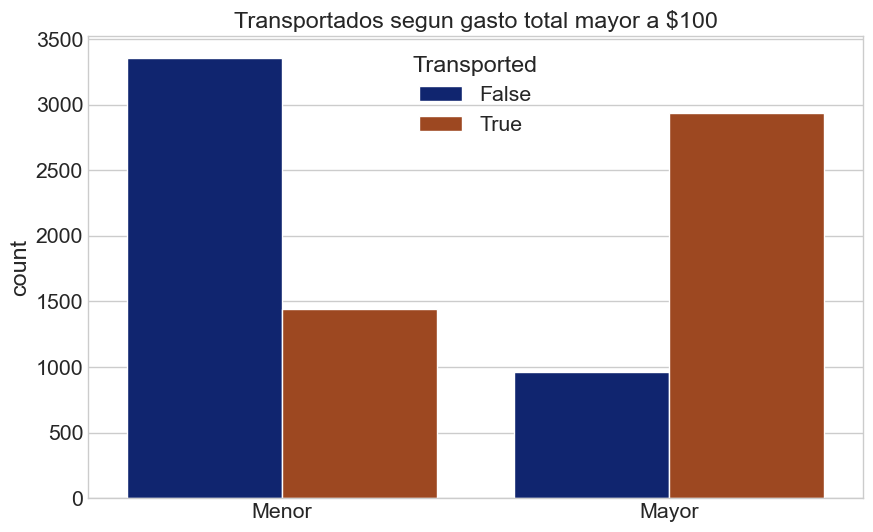

In [567]:
train_data['GastoMayor'] = train_data[  'Gasto Total'  ] < 100

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x='GastoMayor', hue='Transported')
plt.title('Transportados segun gasto total mayor a $100')
plt.xlabel('', fontweight='bold')
plt.xticks([False, True], ['Menor', 'Mayor'])
plt.show()


# Nulos de Variables Restantes

## Para CryoSleep diremos que cualquiera que su gasto total sea igual a 0 estaba dormido, si hubo gasto sabemos que estaba despierto

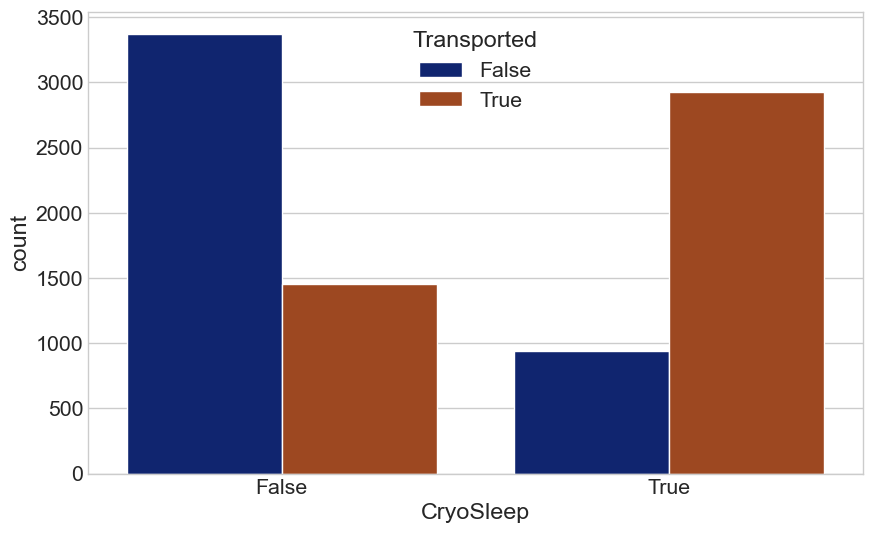

In [568]:

train_data.loc[ train_data['Gasto Total'] == 0 & train_data['CryoSleep'].isnull(), 'CryoSleep' ] = True
train_data.loc[ train_data['Gasto Total'] != 0 & train_data['CryoSleep'].isnull(), 'CryoSleep' ] = False

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x='CryoSleep', hue= 'Transported')
plt.show()

train_data['CryoSleep'] = train_data['CryoSleep'].astype(bool)

## Para el VIP veremos solo los que mas gastan. el resto no es Vip

Text(0, 0.5, '')

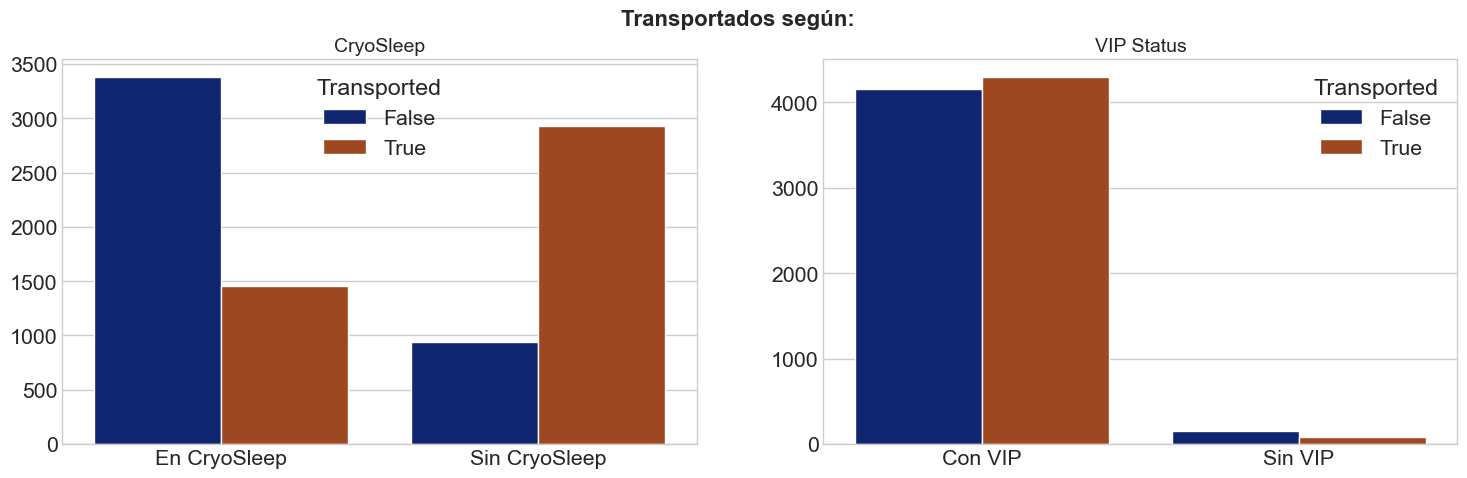

In [569]:
# 1. Crear percentil 95 de gasto
vip_threshold = train_data['Gasto Total'].quantile(0.75)

# 2. Imputar VIP=True para alto gasto
train_data.loc[(train_data['Gasto Total'] >=vip_threshold) & train_data['VIP'].isnull(), 'VIP'] = True
train_data.loc[(train_data['Gasto Total'] < vip_threshold) & train_data['VIP'].isnull(), 'VIP'] = False

train_data['VIP'] = train_data['VIP'].astype(bool)

train_data.isnull().sum()

plt.figure(figsize=(18,5))
plt.suptitle('Transportados según:', fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
ax1 = sns.countplot(data=train_data, x='CryoSleep', hue='Transported' )
plt.title('CryoSleep', fontsize=14)
plt.xlabel('', fontweight='bold')
plt.xticks([False, True], ['En CryoSleep', 'Sin CryoSleep'])
plt.ylabel('')

aa = plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=train_data, x='VIP', hue='Transported' )
plt.title('VIP Status', fontsize=14)
plt.xlabel('', fontweight='bold')
plt.xticks([False, True], ['Con VIP', 'Sin VIP'])
plt.ylabel('')


# Resultados del análisis

De PassengerId obtuvimos los datos de GrupoId y SubId dentro del grupo. Con estos valores se logró determinar si el pasajero llegó solo o acompañado. Esto no necesariamente se relaciona con los familiares a bordo que podrian haber embarcado por separado.

Luego, de HomePlanet y Destination descubrimos que la mayoría viene desde la tierra y viaja hacia trappist. Calculamos los itinerarios de cada uno y luego clasificamos con variables categóricas si su viaje es tierra-trapist o no. Estas variables parecen tener alto contraste en los transportados.

Cryosleep tambien parece ser determinante a la hora de predecir, a diferencia de VIP que parecen estar distrivuidos por igual los supervivientes.

En la cabina analisamos la distribución de transportados por Piso, Numero de cubierta y Lado. Pudimos observar que el número de cubierta y el piso muestran caracterisitcas útiles con el lado en menor grado. Fueron separados los pasajeros en 4 zonas distintas que muestran un alto contraste

La edad tambien fué categorizada en rangos etarios para mayor contraste mostrando que menores a 20 tienden a sobrevivir. Se puede considerar crear el dato booleano menor a 18 para simplificar mas.

Las columnas candidatas creadas durante este análisis para ser entregadas a un modelo son


In [570]:
train_data_final = train_data[[
    'CryoSleep', 'VIP',  # vienen tal cual
    'GrupoId', 'GrupoSize', 'Solo', # salen de passengerID  
    'T-T', 'A_trappist', 'terricola', # salen de HomePlanet y Destination 
    'Piso', 'Número de cubierta', 'Lado', 'Zona', # Salen de Cabin P/N/L
    'Rango etario', 'MenorDeEdad', # categorizacion de la edad
    'Num. Fam. Abordo', # Sale de contar los apellidos iguales
    'Gasto Total', 'GastoMayor' # Sale de los gastos del pasajero
]
]
train_data_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CryoSleep           8693 non-null   bool   
 1   VIP                 8693 non-null   bool   
 2   GrupoId             8693 non-null   int64  
 3   GrupoSize           8693 non-null   int64  
 4   Solo                8693 non-null   int64  
 5   T-T                 8693 non-null   bool   
 6   A_trappist          8693 non-null   bool   
 7   terricola           8693 non-null   bool   
 8   Piso                8693 non-null   object 
 9   Número de cubierta  8693 non-null   float64
 10  Lado                8693 non-null   object 
 11  Zona                8693 non-null   object 
 12  Rango etario        8693 non-null   object 
 13  MenorDeEdad         8693 non-null   bool   
 14  Num. Fam. Abordo    8693 non-null   float64
 15  Gasto Total         8693 non-null   float64
 16  GastoM